## 例 2.8.1
　系 $ \dot{x} = x (1 - x) $ の時間 $t$ と $x$ の関係をプロットする。

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def runge_kutta_method(t, h, x, func):
    k1 = func(t, x) * h
    k2 = func(t + h / 2.0, x + k1 / 2.0) * h
    k3 = func(t + h / 2.0, x + k2 / 2.0) * h
    k4 = func(t + h, x + k3) * h
    return x + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0

In [37]:
def diff_logistic_eq(t, x):
    dx = x * (1 - x)
    return dx

In [38]:
initial_value_list = [
    0.2,
    0.4,
    0.6,
    0.8,
    1.0,
    1.2,
    1.4,
    1.6,
    1.8,
    2.0
]

In [39]:
def solve_eq(initial_x_value, num_itr):
    h = 0.01 # step size.
    t = 0.0 # initial time.
    x_list = []
    time_list = []
    x = initial_x_value

    for i in range(0, num_itr):
        x = runge_kutta_method(t, h, x, diff_logistic_eq)
        x_list.append(x)
        time_list.append(t)
        t = t + h
    return time_list, x_list

In [40]:
def solve_with_each_initial_value(initial_x_values):
    num_itr = 1000
    solution_list = [] # list of tuple (time_list, x_list).

    for ini_value in initial_x_values:
        t_list, x_list = solve_eq(ini_value, num_itr)
        solution_list.append((t_list, x_list))
    return solution_list

In [41]:
solution_list = solve_with_each_initial_value(initial_value_list) # [(time_list, x_list), (time_list, x_list), ...]

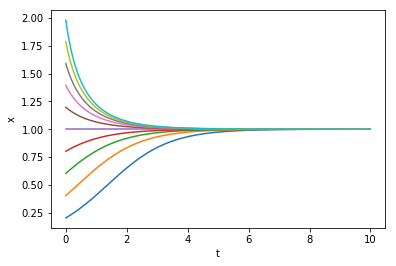

In [42]:
plt.xlabel('t')
plt.ylabel('x')
for i in range(0, 10):
    plt.plot(solution_list[i][0], solution_list[i][1])